In [1]:
'''
This file plots CMIP5 RCP - HIST over South Australia
/Users/earl/Desktop/Yang
and places the outputs in
/Users/earl/Dropbox/CMIP5/figures

Earl Duran 
created: 19-Mar-18
e.duran@unsw.edu.au
'''

import cosima_cookbook as cc
import os
import xarray as xr
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import sys
import pickle
import itertools
def find_nearest_index(array, value):
    return int((np.abs(array - value)).argmin())
from scipy import interpolate
from scipy import stats
from dask.distributed import Client

import cartopy.crs as ccrs
import cartopy.feature as cft
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

netcdf_index loaded.
Available exptdata keys:  ['1deg', '025deg', '01deg']


In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [3]:
client = Client()
client

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.04/lib/python3.6/site-packages/distributed/bokeh/core.py:74: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn("\n" + msg)


Client Scheduler: tcp://127.0.0.1:32772 Dashboard: http://127.0.0.1:44088/status,Cluster Workers: 4 Cores: 8 Memory: 33.67 GB


In [4]:
# input_path = '/g/data/e14/erd561/NOAA_OI_SST_V2/'

output_path = '/g/data/e14/erd561/access-om2/'

In [8]:
lonW = 90
lonE = 180

latS = -70
latN = 20

year = np.arange(1993,2018,1)

tstart = exptdata.clim_tstart
tend = exptdata.clim_tend


ekey='1deg'
expt = exptdata.exptdict[ekey]['expt']
n_files = exptdata.exptdict[ekey]['n_files']
time_units = exptdata.exptdict[ekey]['time_units']
offset = exptdata.exptdict[ekey]['offset']
sst_1 = cc.get_nc_variable(expt, 'ocean.nc', 'temp',
                        chunks={'st_ocean': None}, n=n_files,
                        time_units=time_units, offset=offset).\
                        sel(st_ocean=500, method='nearest').\
                        sel(xt_ocean=slice(lonW-360,lonE-360)).\
                        sel(yt_ocean=slice(latS,latN)).\
                        sel(time=slice(exptdata.clim_tstart,exptdata.clim_tend))
sst_1.load()
print(sst_1)

Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db
<xarray.DataArray 'temp' (time: 25, yt_ocean: 160, xt_ocean: 90)>
array([[[      nan,       nan, ..., 272.37485, 272.38843],
        [      nan,       nan, ..., 272.3514 , 272.36536],
        ...,
        [284.11826, 284.07526, ..., 281.8601 , 281.70346],
        [284.0726 , 284.07004, ..., 282.0277 , 281.8692 ]],

       [[      nan,       nan, ..., 272.36835, 272.3833 ],
        [      nan,       nan, ..., 272.3491 , 272.36227],
        ...,
        [284.06326, 284.0174 , ..., 281.31793, 281.20114],
        [284.0046 , 284.00522, ..., 281.47037, 281.36914]],

       ...,

       [[      nan,       nan, ..., 272.24524, 272.2639 ],
        [      nan,       nan, ..., 272.23538, 272.25586],
        ...,
        [284.37543, 284.35724, ..., 282.1767 , 282.22043],
        [284.366  , 284.36298, ..., 282.82388, 282.9233 ]],

       [[      nan,       nan, ..., 272.2245 , 272.24976],
        [      nan,      

In [9]:
ekey='025deg'
expt = exptdata.exptdict[ekey]['expt']
n_files = exptdata.exptdict[ekey]['n_files']
time_units = exptdata.exptdict[ekey]['time_units']
offset = exptdata.exptdict[ekey]['offset']
sst_025 = cc.get_nc_variable(expt, 'ocean.nc', 'temp',
                        chunks={'st_ocean': None}, n=n_files,
                        time_units=time_units, offset=offset).\
                        sel(st_ocean=500, method='nearest').\
                        sel(xt_ocean=slice(lonW-360,lonE-360)).\
                        sel(yt_ocean=slice(latS,latN)).\
                        sel(time=slice(exptdata.clim_tstart,exptdata.clim_tend))
sst_025.load()
print(sst_025)

Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db
<xarray.DataArray 'temp' (time: 25, yt_ocean: 475, xt_ocean: 360)>
array([[[      nan,       nan, ..., 272.99533, 272.99872],
        [      nan,       nan, ..., 272.9835 , 272.98636],
        ...,
        [284.61096, 284.59924, ..., 281.55637, 281.55045],
        [284.5476 , 284.55905, ..., 281.56345, 281.55902]],

       [[      nan,       nan, ..., 272.9871 , 272.98978],
        [      nan,       nan, ..., 272.9764 , 272.97845],
        ...,
        [284.56345, 284.56033, ..., 281.5163 , 281.51047],
        [284.5247 , 284.5399 , ..., 281.5513 , 281.54086]],

       ...,

       [[      nan,       nan, ..., 272.90613, 272.90668],
        [      nan,       nan, ..., 272.89584, 272.897  ],
        ...,
        [284.75287, 284.73895, ..., 281.57034, 281.58533],
        [284.62808, 284.6486 , ..., 281.6262 , 281.63687]],

       [[      nan,       nan, ..., 272.91373, 272.91458],
        [      nan,     

In [10]:
ekey='01deg'
expt = exptdata.exptdict[ekey]['expt']
n_files = exptdata.exptdict[ekey]['n_files']
time_units = exptdata.exptdict[ekey]['time_units']
offset = exptdata.exptdict[ekey]['offset']
sst_01_month = cc.get_nc_variable(expt, 'ocean.nc', 'temp',
                        chunks={'st_ocean': None}, n=n_files,
                        time_units=time_units, offset=offset).\
                        sel(st_ocean=500, method='nearest').\
                        sel(xt_ocean=slice(lonW-360,lonE-360)).\
                        sel(yt_ocean=slice(latS,latN)).\
                        sel(time=slice(exptdata.clim_tstart,exptdata.clim_tend))
sst_01_month.load()

sst_01 = sst_01_month.groupby('time.year').mean('time', skipna=True)

print(sst_01)

Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.04/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray 'temp' (year: 25, yt_ocean: 1186, xt_ocean: 900)>
array([[[      nan,       nan, ..., 274.8843 , 274.88498],
        [      nan,       nan, ..., 274.8829 , 274.88303],
        ...,
        [283.0962 , 283.09756, ..., 279.31122, 279.30692],
        [283.10947, 283.10654, ..., 279.3311 , 279.32773]],

       [[      nan,       nan, ..., 274.89343, 274.8939 ],
        [      nan,       nan, ..., 274.89352, 274.89325],
        ...,
        [283.0546 , 283.05743, ..., 279.39474, 279.39618],
        [283.06808, 283.0681 , ..., 279.42343, 279.4243 ]],

       ...,

       [[      nan,       nan, ..., 274.7576 , 274.75867],
        [      nan,       nan, ..., 274.75974, 274.7637 ],
        ...,
        [283.209  , 283.20728, ..., 279.20322, 279.19315],
        [283.21597, 283.212  , ..., 279.20956, 279.196  ]],

       [[      nan,       nan, ..., 274.6422 , 274.64624],
        [      nan,       nan, ..., 274.64255, 274.6452 ],
        ...,
        [283.11826, 283.12073, ...,

In [11]:
lat_1 = sst_1.yt_ocean
lon_1 = sst_1.xt_ocean

sst_1_trans = sst_1
print(np.shape(sst_1_trans))
sst_1_slopes = xr.DataArray(
    np.zeros([np.shape(lat_1)[0], np.shape(lon_1)[0]]), dims=(
    'lat_1', 'lon_1'), coords=[lat_1, lon_1], name='sst_1')
for iid, i in enumerate(lat_1):
    for jid, j in enumerate(lon_1):
        sst_1_slopes[iid, jid], _, _, _, _ = \
        stats.linregress(year, sst_1_trans[:, iid, jid])
    print('lat_1 ' + str(np.array(i)))
print(sst_1_slopes)

(25, 160, 90)
lat_1 -69.6292858330716
lat_1 -69.17632154294074
lat_1 -68.70935410409521
lat_1 -68.22843658249317
lat_1 -67.73301847540898
lat_1 -67.2232002021303
lat_1 -66.69847936238045
lat_1 -66.15900514695375
lat_1 -65.60432451496254
lat_1 -65.03463652231858
lat_1 -64.44953841598465
lat_1 -63.84927987875662
lat_1 -63.233509039251814
lat_1 -62.602526632003375
lat_1 -61.95603192247815
lat_1 -61.29437678205883
lat_1 -60.61731152794955
lat_1 -59.92523891318751
lat_1 -59.21795988186098
lat_1 -58.49592747485757
lat_1 -57.75899250138302
lat_1 -57.00765736171395
lat_1 -56.24182163656275
lat_1 -55.46203582865502
lat_1 -54.66824687203264
lat_1 -53.86105179481633
lat_1 -53.04044315107174
lat_1 -52.20706260764199
lat_1 -51.36094630171701
lat_1 -50.50277835512628
lat_1 -49.63263616124607
lat_1 -48.751243830625256
lat_1 -47.858717411335334
lat_1 -46.955818270259286
lat_1 -46.04269825143213
lat_1 -45.12015299775091
lat_1 -44.1883670522662
lat_1 -43.24816712546786
lat_1 -42.299767144867545
lat_1 -4

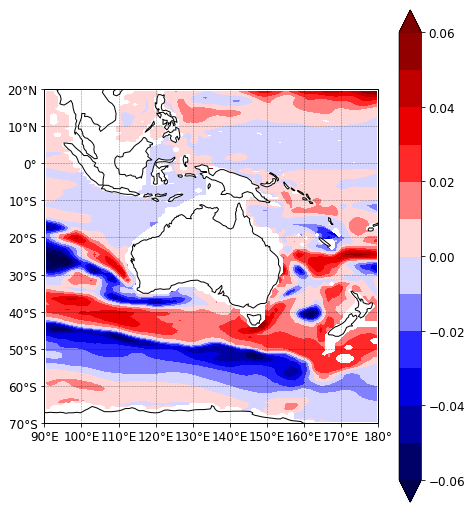

In [12]:
land_50m= cft.NaturalEarthFeature('physical', 'land', '110m',
                                    edgecolor='black',
                                    facecolor='white',
                                    linewidth=1)

fig = plt.figure(figsize=(7.48,9.06)) 
matplotlib.rcParams.update({'font.size': 12}) 

ax = plt.axes(projection=ccrs.PlateCarree())

levels=arange(-0.06,0.06,0.01)

plt.contourf(lon_1+360, lat_1, sst_1_slopes, levels=levels, extend='both',
             cmap=plt.cm.seismic, transform=ccrs.PlateCarree())
plt.colorbar()

ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 10), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 10), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)



In [13]:
lat_025 = sst_025.yt_ocean
lon_025 = sst_025.xt_ocean

sst_025_trans = sst_025
print(np.shape(sst_025_trans))
sst_025_slopes = xr.DataArray(
    np.zeros([np.shape(lat_025)[0], np.shape(lon_025)[0]]), dims=(
    'lat_025', 'lon_025'), coords=[lat_025, lon_025], name='sst_025')
for iid, i in enumerate(lat_025):
    for jid, j in enumerate(lon_025):
        sst_025_slopes[iid, jid], _, _, _, _ = \
        stats.linregress(year, sst_025_trans[:, iid, jid])
    print('lat_025 ' + str(np.array(i)))
print(sst_025_slopes)

(25, 475, 360)
lat_025 -69.98914896732052
lat_025 -69.8835503781156
lat_025 -69.77795178891068
lat_025 -69.67235319970577
lat_025 -69.56675461050085
lat_025 -69.46115602129593
lat_025 -69.35555743209102
lat_025 -69.2499588428861
lat_025 -69.14436025368119
lat_025 -69.03876166447627
lat_025 -68.93316307527135
lat_025 -68.82756448606644
lat_025 -68.72196589686152
lat_025 -68.6163673076566
lat_025 -68.51076871845169
lat_025 -68.40517012924677
lat_025 -68.29957154004185
lat_025 -68.19397295083694
lat_025 -68.08837436163202
lat_025 -67.9827757724271
lat_025 -67.87717718322219
lat_025 -67.77157859401727
lat_025 -67.66598000481235
lat_025 -67.56038141560744
lat_025 -67.45478282640252
lat_025 -67.3491842371976
lat_025 -67.24358564799269
lat_025 -67.13798705878777
lat_025 -67.03238846958286
lat_025 -66.92678988037794
lat_025 -66.82119129117302
lat_025 -66.7155927019681
lat_025 -66.60999411276319
lat_025 -66.50439552355827
lat_025 -66.39879693435336
lat_025 -66.29319834514844
lat_025 -66.1875997

lat_025 -22.290512579189507
lat_025 -22.05900238160839
lat_025 -21.827113779962115
lat_025 -21.594847390368724
lat_025 -21.362208986176793
lat_025 -21.129199251428126
lat_025 -20.89582401067619
lat_025 -20.66208401512598
lat_025 -20.427985140143456
lat_025 -20.193528203294715
lat_025 -19.958719130323008
lat_025 -19.723558804311843
lat_025 -19.48805320090374
lat_025 -19.252203267814213
lat_025 -19.016015030064167
lat_025 -18.77948949907405
lat_025 -18.542632748679452
lat_025 -18.30544585303702
lat_025 -18.06793493419064
lat_025 -17.830101128022857
lat_025 -17.591950604136887
lat_025 -17.35348455908949
lat_025 -17.114709209351908
lat_025 -16.875625811062203
lat_025 -16.636240626826247
lat_025 -16.396554971229563
lat_025 -16.156575152237487
lat_025 -15.916302541708545
lat_025 -15.675743492150964
lat_025 -15.434899431481558
lat_025 -15.193776755893923
lat_025 -14.952376948108617
lat_025 -14.710706447106602
lat_025 -14.468766789118314
lat_025 -14.22656445497414
lat_025 -13.984101033081737
l

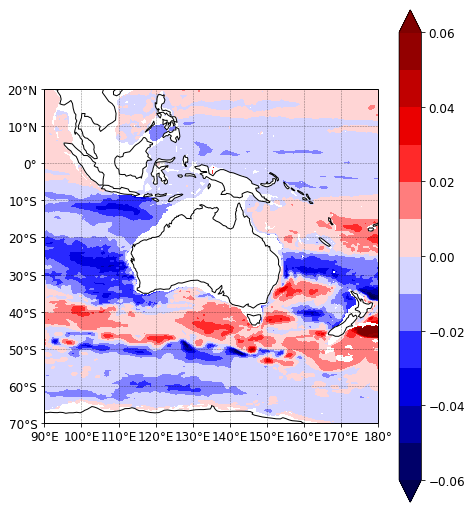

In [14]:
land_50m= cft.NaturalEarthFeature('physical', 'land', '110m',
                                    edgecolor='black',
                                    facecolor='white',
                                    linewidth=1)

fig = plt.figure(figsize=(7.48,9.06)) 
matplotlib.rcParams.update({'font.size': 12}) 

ax = plt.axes(projection=ccrs.PlateCarree())

levels=arange(-0.06,0.06,0.01)

plt.contourf(lon_025+360, lat_025, sst_025_slopes, levels=levels, extend='both',
             cmap=plt.cm.seismic, transform=ccrs.PlateCarree())
plt.colorbar()

ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 10), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 10), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)

In [15]:
lat_01 = sst_01.yt_ocean
lon_01 = sst_01.xt_ocean

sst_01_trans = sst_01
print(np.shape(sst_01_trans))
sst_01_slopes = xr.DataArray(
    np.zeros([np.shape(lat_01)[0], np.shape(lon_01)[0]]), dims=(
    'lat_01', 'lon_01'), coords=[lat_01, lon_01], name='sst_01')
for iid, i in enumerate(lat_01):
    for jid, j in enumerate(lon_01):
        sst_01_slopes[iid, jid], _, _, _, _ = \
        stats.linregress(year, sst_01_trans[:, iid, jid])
    print('lat_01 ' + str(np.array(i)))
print(sst_01_slopes)

(25, 1186, 900)
lat_01 -69.99968147628742
lat_01 -69.95744212190694
lat_01 -69.91520276752645
lat_01 -69.87296341314597
lat_01 -69.83072405876548
lat_01 -69.788484704385
lat_01 -69.74624535000451
lat_01 -69.70400599562403
lat_01 -69.66176664124355
lat_01 -69.61952728686306
lat_01 -69.57728793248258
lat_01 -69.53504857810209
lat_01 -69.49280922372161
lat_01 -69.45056986934112
lat_01 -69.40833051496064
lat_01 -69.36609116058015
lat_01 -69.32385180619967
lat_01 -69.28161245181919
lat_01 -69.2393730974387
lat_01 -69.19713374305822
lat_01 -69.15489438867773
lat_01 -69.11265503429725
lat_01 -69.07041567991676
lat_01 -69.02817632553628
lat_01 -68.9859369711558
lat_01 -68.94369761677531
lat_01 -68.90145826239483
lat_01 -68.85921890801434
lat_01 -68.81697955363386
lat_01 -68.77474019925337
lat_01 -68.73250084487289
lat_01 -68.6902614904924
lat_01 -68.64802213611192
lat_01 -68.60578278173143
lat_01 -68.56354342735095
lat_01 -68.52130407297047
lat_01 -68.47906471858998
lat_01 -68.4368253642095
la

lat_01 -55.352477717530064
lat_01 -55.295584207874
lat_01 -55.23860914063544
lat_01 -55.18155218761087
lat_01 -55.124413555101775
lat_01 -55.067192916144876
lat_01 -55.00989047675615
lat_01 -54.95250591121559
lat_01 -54.89503942526325
lat_01 -54.83749069442549
lat_01 -54.77985992417602
lat_01 -54.722146791290726
lat_01 -54.66435150098657
lat_01 -54.60647373129214
lat_01 -54.54851368717732
lat_01 -54.49047104792663
lat_01 -54.43234601827253
lat_01 -54.37413827875874
lat_01 -54.315848033889985
lat_01 -54.25747496547251
lat_01 -54.19901927779302
lat_01 -54.14048065392365
lat_01 -54.08185929794283
lat_01 -54.02315489419197
lat_01 -53.96436764655098
lat_01 -53.90549724063403
lat_01 -53.84654388013229
lat_01 -53.78750725193614
lat_01 -53.728387559557866
lat_01 -53.66918449116759
lat_01 -53.609898250108515
lat_01 -53.5505285258341
lat_01 -53.491075521528344
lat_01 -53.43153892793163
lat_01 -53.37191894807864
lat_01 -53.31221527400035
lat_01 -53.25242810859202
lat_01 -53.19255714517893
lat_01 

lat_01 -33.38319243613102
lat_01 -33.29965145599879
lat_01 -33.2160302958929
lat_01 -33.1323292394624
lat_01 -33.04854820702588
lat_01 -32.964687483444955
lat_01 -32.880746990946676
lat_01 -32.79672701561119
lat_01 -32.71262748157553
lat_01 -32.62844867614426
lat_01 -32.544190525365785
lat_01 -32.45985331777485
lat_01 -32.375436981332555
lat_01 -32.29094180580946
lat_01 -32.20636772108053
lat_01 -32.12171501815771
lat_01 -32.0369836288309
lat_01 -31.952173845358825
lat_01 -31.867285601447325
lat_01 -31.78231919060719
lat_01 -31.69727454846106
lat_01 -31.612151969776978
lat_01 -31.52695139209512
lat_01 -31.441673111445844
lat_01 -31.356317067287502
lat_01 -31.270883556917696
lat_01 -31.18537252171347
lat_01 -31.09978426024449
lat_01 -31.014118715806898
lat_01 -30.92837618824709
lat_01 -30.842556622780595
lat_01 -30.75666032053511
lat_01 -30.67068722864571
lat_01 -30.58463764952582
lat_01 -30.4985115322301
lat_01 -30.412309180462007
lat_01 -30.32603054519571
lat_01 -30.23967593142886
lat

lat_01 -4.445535087709209
lat_01 -4.345829235504632
lat_01 -4.24611011946482
lat_01 -4.146378192681186
lat_01 -4.04663360298316
lat_01 -3.94687680380864
lat_01 -3.847107943401642
lat_01 -3.747327475530425
lat_01 -3.6475355488337176
lat_01 -3.5477326173939625
lat_01 -3.447918830224677
lat_01 -3.3480946417062576
lat_01 -3.2482602012070356
lat_01 -3.148415963389082
lat_01 -3.0485620779555203
lat_01 -2.94869899983377
lat_01 -2.848826879041682
lat_01 -2.748946170755653
lat_01 -2.6490570252881533
lat_01 -2.549159898048146
lat_01 -2.4492549396225742
lat_01 -2.349342605636517
lat_01 -2.2494230469312058
lat_01 -2.14949671933135
lat_01 -2.0495637739122525
lat_01 -1.9496246666817336
lat_01 -1.8496795489289182
lat_01 -1.7497288768281885
lat_01 -1.6497728018622135
lat_01 -1.5498117803553606
lat_01 -1.4498459639635393
lat_01 -1.3498758091444996
lat_01 -1.2499014677070654
lat_01 -1.1499233962257456
lat_01 -1.0499417466419305
lat_01 -0.949956975630244
lat_01 -0.8499692352442787
lat_01 -0.7499789822421

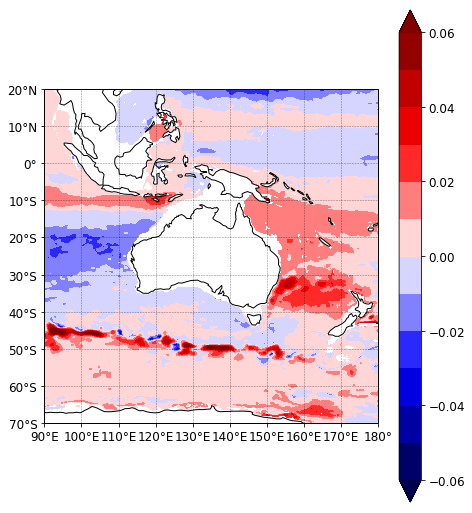

In [16]:
land_50m= cft.NaturalEarthFeature('physical', 'land', '110m',
                                    edgecolor='black',
                                    facecolor='white',
                                    linewidth=1)

fig = plt.figure(figsize=(7.48,9.06)) 
matplotlib.rcParams.update({'font.size': 12}) 

ax = plt.axes(projection=ccrs.PlateCarree())

levels=arange(-0.06,0.06,0.01)

plt.contourf(lon_01+360, lat_01, sst_01_slopes, levels=levels, extend='both',
             cmap=plt.cm.seismic, transform=ccrs.PlateCarree())
plt.colorbar()

ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 10), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 10), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)

In [17]:
temp_500_1_xr = xr.DataArray(sst_1.transpose('yt_ocean', 'xt_ocean', 'time'), name='temp_500_1',
                        coords=[lat_1, lon_1, year], 
                        dims=['yt_ocean', 'xt_ocean', 'time'])
print(temp_500_1_xr)
temp_500_1_xr.to_netcdf(output_path + 'temp_500_1.nc')

temp_500_1_slopes_xr = xr.DataArray(sst_1_slopes, name='temp_500_1_slopes',
                        coords=[lat_1, lon_1], 
                        dims=['yt_ocean', 'xt_ocean'])
print(temp_500_1_slopes_xr)
temp_500_1_slopes_xr.to_netcdf(output_path + 'temp_500_1_slopes.nc')



temp_500_025_xr = xr.DataArray(sst_025.transpose('yt_ocean', 'xt_ocean', 'time'), name='temp_500_025',
                        coords=[lat_025, lon_025, year], 
                        dims=['yt_ocean', 'xt_ocean', 'time'])
print(temp_500_025_xr)
temp_500_025_xr.to_netcdf(output_path + 'temp_500_025.nc')

temp_500_025_slopes_xr = xr.DataArray(sst_025_slopes, name='temp_500_025_slopes',
                        coords=[lat_025, lon_025], 
                        dims=['yt_ocean', 'xt_ocean'])
print(temp_500_025_slopes_xr)
temp_500_025_slopes_xr.to_netcdf(output_path + 'temp_500_025_slopes.nc')



temp_500_01_xr = xr.DataArray(sst_01.transpose('yt_ocean', 'xt_ocean', 'year'), name='temp_500_01',
                        coords=[lat_01, lon_01, year], 
                        dims=['yt_ocean', 'xt_ocean', 'year'])
print(temp_500_01_xr)
temp_500_01_xr.to_netcdf(output_path + 'temp_500_01.nc')

temp_500_01_slopes_xr = xr.DataArray(sst_01_slopes, name='temp_500_01_slopes',
                        coords=[lat_01, lon_01], 
                        dims=['yt_ocean', 'xt_ocean'])
print(temp_500_01_slopes_xr)
temp_500_01_slopes_xr.to_netcdf(output_path + 'temp_500_01_slopes.nc')

<xarray.DataArray 'temp_500_1' (yt_ocean: 160, xt_ocean: 90, time: 25)>
array([[[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [272.37485, 272.36835, ..., 272.24524, 272.2245 ],
        [272.38843, 272.3833 , ..., 272.2639 , 272.24976]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [272.3514 , 272.3491 , ..., 272.23538, 272.24542],
        [272.36536, 272.36227, ..., 272.25586, 272.26096]],

       ...,

       [[284.11826, 284.06326, ..., 284.37543, 284.1733 ],
        [284.07526, 284.0174 , ..., 284.35724, 284.10538],
        ...,
        [281.8601 , 281.31793, ..., 282.1767 , 282.94748],
        [281.70346, 281.20114, ..., 282.22043, 282.73172]],

       [[284.0726 , 284.0046 , ..., 284.366  , 284.0979 ],
        [284.07004, 284.00522, ..., 284.36298, 284.07913],
        ...,
        [282.0277 , 281.47037, 